##¿Deberíamos aprobar o no el préstamo?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.options.display.max_columns = 500


##Problema de negocio

### Contexto comercial y motivación

La Administración de Pequeñas Empresas de EE.UU. (SBA, United States Small Business Administration) es una agencia del gobierno federal de los Estados Unidos que brinda apoyo a empresarios y pequeñas empresas.Se fundó en 1953 sobre el principio de promover y ayudar a las pequeñas empresas en el mercado crediticio de los EE. UU. <br>
Las pequeñas empresas han sido una fuente primaria de creación de trabajo en los Estados Unidos; por lo tanto, fomentar la formación y crecimiento de  pequeñas empresas tiene beneficios sociales creando oportunidades de empleo y reduciendo el desempleo. Una forma en que la SBA ayuda a estas pequeñas empresas es a través de un programa de garantía de préstamo que está diseñado para alentar a los bancos a otorgar préstamos a las pequeñas empresas. La SBA actúa como un proveedor de seguros para reducir el riesgo de un banco al asumir parte del riesgo garantizando una parte del préstamo. En el caso de que un préstamo entre en incumplimiento, la SBA cubre el monto garantizado.<br>
Ha habido muchas historias de éxito de empresas emergentes que recibieron garantías de préstamos de la SBA, como FedEx y Apple Computer. Sin embargo, también ha habido historias de pequeñas empresas y/o nuevas empresas que han incumplido con sus préstamos garantizados por la SBA. La tasa de morosidad de estos préstamos ha sido motivo de controversia durante décadas. Los economistas conservadores creen que los mercados de crédito funcionan de manera eficiente sin la participación del gobierno. Los partidarios de los préstamos garantizados por la SBA argumentan que los beneficios sociales de la creación de empleo por parte de las pequeñas empresas que reciben préstamos garantizados por el gobierno superan con creces los costos incurridos por los préstamos en mora.<br>

Actualmente la SBA decidió modernizarse y armó un equipo de Analytics para mejorar su sistema de aprobación de créditos. Yo soy un científico de datos de ese equipo.

###Problema comercial

Dado que los préstamos de la SBA solo garantizan una parte del saldo total del préstamo, los bancos incurrirán en algunas pérdidas si una pequeña empresa no cumple con su préstamo garantizado por la SBA. Por lo tanto, los bancos aún se enfrentan a una difícil decisión sobre si deben otorgar dicho préstamo debido al alto riesgo de incumplimiento. Una forma de informar su toma de decisiones es mediante el análisis de datos históricos relevantes, como los conjuntos de datos proporcionados aquí.<br>
El problema empresarial es decidir si un préstamo puede ser otorgado, con una probabilidad razonable de que la empresa que lo solicita pueda cancelarlo sin inconvenientes.

### Objetivo


El objetivo es armar un modelo que en base a los datos de un potencial nuevo préstamo, decida si es conveniente otorgar el préstamo o no.

##Contexto y enfoque analítico

Se busca implementar un modelo de machine learning que con los distintos valores de los campos del dataset, prediga si la empresa tuvo dificultades en pagar el préstamo, lo que puede llamarse de forma más corta como "incumplir los pagos".

###Campos del dataset

Los campos que se encuentran en el dataset son los siguientes:

**- LoanNr_ChkDgt**: Identificador-primary key

**- Name**: Nombre del prestatario

**- City**: Ciudad del prestatario

**- State**: Estado de EE.UU. del prestatario

**- Zip**: Código postal del prestatario

**- Bank**: Nombre del banco

**- BankState**: Estado de origen del banco

**- NAICS**:  Codigo de clasificación de la industria de EE.UU.

**- ApprovalDate**: Fecha de emisión del compromiso emitido por SBA

**- ApprovalFY**: Fecha fiscal del compromiso

**- Term**: plazo del préstamo en meses

**- NoEmp**: Número de empleados de la empresa

**- NewExist**:1=Negocio existente, 2=Nuevo negocio

**- CreateJob**: número de puestos de trabajos creados

**- RetainedJob**: número de puestos de trabajo retenidos

**- FranchiseCode**:Código de franquicia, (00000 o 00001)=Sin franquicia

**- UrbanRural**: 1=Urbano, 2=rural, 0=indefinido

**- RevLineCr**: Linea de crédito renovable Y=Si, N=No

**- LowDoc**:Programa de préstamos LowDoc: Y=Si y N=No

**- ChgOffDate**: Fecha en que se declara que un préstamo está en mora

**- DisbursementDate**: Fecha de pago (entrega del préstamo)

**- DisbursementGross**: Monto desembolsado/pagado bruto (por entrega préstamo)

**- BalanceGross**:Cantidad bruta pendiente de devolución (al momento de confección del dataset)

**- MIS_Status**: Estado del préstamo: Con incovenientes = CHGOFF, pagado en su totalidad = PIF

**- ChgOffPrinGr**: Importe cancelado (no devuelto)

**- GrAppv**: Monto bruto del préstamo aprobado por el banco

**- SBA_Appv**: Monto garantizado del préstamo aprobado por la SBA

 
Dado que el dataset está etiquetado (el campo MIS_Status indica si hubo inconvenientes o no en el préstamo), es un problema de aprendizaje supervisado, más específicamente, de clasificación. La categoría que se desea asignar a los préstamos futuros corresponde con la variable objetivo, MIS_Status.

### Preguntas e hipótesis###


¿Cuáles son las características de las empresas que mejor predicen si la empresa va a tener inconvenientes o no al pagar el préstamo? ¿Cómo influye el banco prestatario y la línea de crédito? ¿Existe relación con el plazo del préstamo? ¿Y con el año que se hizo el préstamo? (Esta última pregunta está intimamente relacionada al estado ecónomico del país).

Los campos que creemos que pueden ser más relevantes de la empresa que pide el préstamo son: 'State', 'NAICS', 'NoEmp', 'NewExist', 'UrbanRural'.

Con respecto al banco y la línea de crédito que nos parecen más relevantes son: 'BankState', 'RevLineCr', 'DisbursementGross', 'GrAppv', 'SBA_Appv'.

Para ver si hay relación con los plazos, vamos a estudiar el campo 'Term'.

Sobre la relación con los años de los préstamos, creemos que los campos 'DisbursementDate', 'ApprovalDate', 'ApprovalFY' y 'ChgOffDate' son relevantes, aunque probablemente los tres primeros sean muy similares. 

## Preparación y limpieza de datos##


In [ ]:
loan = pd.read_csv(path + "Should This Loan be Approved or Denied.csv", dtype={'ApprovalFY': str}) #La columna ApprovalFY se la fuerza a ser string porque en el dataset original dicha columna se la reconoce como con valores mixtos.

In [ ]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  object 
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899164 non-null  int64  
 15  FranchiseCode      899164 non-null  int64  
 16  Ur

In [ ]:
loan.describe(include = 'all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
LoanNr_ChkDgt,899164.0,NaN,NaN,NaN,4772612310.59431,2538175037.45304,1000014003.0,2589757508.5,4361439006.0,6904626504.75,9996003010.0
Name,899150,779583,SUBWAY,1269,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,899134,32581,LOS ANGELES,11558,NaN,NaN,NaN,NaN,NaN,NaN,NaN
State,899150,51,CA,130619,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zip,899164.0,NaN,NaN,NaN,53804.391241,31184.159152,0.0,27587.0,55410.0,83704.0,99999.0
Bank,897605,5802,BANK OF AMERICA NATL ASSOC,86853,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BankState,897598,56,CA,118116,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NAICS,899164.0,NaN,NaN,NaN,398660.950146,263318.31276,0.0,235210.0,445310.0,561730.0,928120.0
ApprovalDate,899164,9859,7-Jul-93,1131,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ApprovalFY,899164,52,2005,77525,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
loan.head(10)

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,4,2.0,0,0,1,0,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,2,2.0,0,0,1,0,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,180,7,1.0,0,0,1,0,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,60,2,1.0,0,0,1,0,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,240,14,1.0,7,7,1,0,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"
5,1000084002,"B&T SCREW MACHINE COMPANY, INC",PLAINVILLE,CT,6062,"TD BANK, NATIONAL ASSOCIATION",DE,332721,28-Feb-97,1997,120,19,1.0,0,0,1,0,N,N,NaN,30-Jun-97,"$517,000.00",$0.00,P I F,$0.00,"$517,000.00","$387,750.00"
6,1000093009,MIDDLE ATLANTIC SPORTS CO INC,UNION,NJ,7083,WELLS FARGO BANK NATL ASSOC,SD,0,2-Jun-80,1980,45,45,2.0,0,0,0,0,N,N,24-Jun-91,22-Jul-80,"$600,000.00",$0.00,CHGOFF,"$208,959.00","$600,000.00","$499,998.00"
7,1000094005,WEAVER PRODUCTS,SUMMERFIELD,FL,34491,REGIONS BANK,AL,811118,28-Feb-97,1997,84,1,2.0,0,0,1,0,N,Y,NaN,30-Jun-98,"$45,000.00",$0.00,P I F,$0.00,"$45,000.00","$36,000.00"
8,1000104006,TURTLE BEACH INN,PORT SAINT JOE,FL,32456,CENTENNIAL BANK,FL,721310,28-Feb-97,1997,297,2,2.0,0,0,1,0,N,N,NaN,31-Jul-97,"$305,000.00",$0.00,P I F,$0.00,"$305,000.00","$228,750.00"
9,1000124001,INTEXT BUILDING SYS LLC,GLASTONBURY,CT,6073,WEBSTER BANK NATL ASSOC,CT,0,28-Feb-97,1997,84,3,2.0,0,0,1,0,N,Y,NaN,30-Apr-97,"$70,000.00",$0.00,P I F,$0.00,"$70,000.00","$56,000.00"


###Reformateo de campos###

Hay varias columnas que tienen valores monetarios y donde los números están en formato que no se los reconoce como números. Para trabajar esos datos conviene formatearlos a datos numéricos. 

In [ ]:
loan[['DisbursementGross', 'BalanceGross', 'GrAppv', 'SBA_Appv']] = (loan[['DisbursementGross', 'BalanceGross', 'GrAppv', 'SBA_Appv']]).replace({"[\$]": "", "[,]": ""}, regex=True) 



In [ ]:
loan['DisbursementGross'] = loan['DisbursementGross'].astype('float') #Si quiero pasar a float más de una columna, devuelve error.
loan['BalanceGross'] = loan['BalanceGross'].astype('float')
loan['GrAppv'] = loan['GrAppv'].astype('float')
loan['SBA_Appv'] = loan['SBA_Appv'].astype('float')

-------------------------------------------------------------------------------------

Otra cosa importante es que las columnas ApprovalDate y
ApprovalFY son datos de fecha, pero uno puede ver que en el dataframe son strings:

In [ ]:
print(pd.api.types.infer_dtype(loan['ApprovalDate']))
print(pd.api.types.infer_dtype(loan['ApprovalFY']))
print(pd.api.types.infer_dtype(loan['DisbursementDate']))
print(pd.api.types.infer_dtype(loan['ChgOffDate']))


string
string
string
string


Debemos convertirlos, veamos que formato tienen.

In [ ]:
loan[['ApprovalDate', 'ApprovalFY', 'DisbursementDate', 'ChgOffDate']].sample(5)


,ApprovalDate,ApprovalFY,DisbursementDate,ChgOffDate
689069,25-Apr-67,1967,NaN,15-Mar-89
808322,2-Mar-05,2005,31-Jan-06,NaN
237547,4-Sep-07,2007,31-Oct-07,NaN
290418,16-Jun-99,1999,30-Jun-99,NaN
274958,17-Jan-08,2008,29-Feb-08,4-Jun-10


Recordemos que la columna 'ChgOffDate' solo tiene contenido en los préstamos que no tuvieron inconvenientes.

In [ ]:
print(loan[loan['MIS_Status']=='CHGOFF'].ChgOffDate.sample(15));

303282    26-Jul-12
70930     27-Jul-11
517516    10-Jun-13
392391    20-Nov-03
280036     7-Jul-11
888819    10-Feb-09
114736     1-Jul-10
388612     6-Feb-13
172238    24-Mar-11
637008     8-Feb-06
863318    14-Dec-01
152777    19-May-10
3242      26-Oct-12
120972    23-Nov-10
278050    17-Apr-14
Name: ChgOffDate, dtype: object


A la columna 'ApprovalFY' simplemente podemos transformarla en entero. El único problema es que NO todas las filas son un año puro:

In [ ]:
print (loan[~loan['ApprovalFY'].str.isdigit()].ApprovalFY)

699732    1976A
704030    1976A
705375    1976A
710381    1976A
713245    1976A
748029    1976A
751519    1976A
769515    1976A
775002    1976A
775430    1976A
775978    1976A
776367    1976A
780120    1976A
781090    1976A
784351    1976A
788539    1976A
788661    1976A
793733    1976A
Name: ApprovalFY, dtype: object


Debemos arreglar esas filas para luego transformarlas.

In [ ]:
loan['ApprovalFY']=loan['ApprovalFY'].str.replace("1976A","1976")    


In [ ]:
loan['ApprovalFY']=loan['ApprovalFY'].astype('int')

Por otro lado, las otras tres columnas tienen formato conflictivo porque están los últimos dos dígitos del año, lo que no permite transformarlas directamente. Haciendo un pequeño análisis se puede ver que los préstamos no son anteriores a 1962. Así que no es difícil saber lo que habría que poner en los dos prímeros dígitos del año.

####Pequeño análisis

In [ ]:
print(loan['ApprovalFY'].min())
print(loan['ApprovalFY'].max())

1962
2014


In [ ]:
(loan['ApprovalDate']).str[-2:]

0         97
1         97
2         97
3         97
4         97
          ..
899159    97
899160    97
899161    97
899162    97
899163    97
Name: ApprovalDate, Length: 899164, dtype: object

####Hacemos una función que nos reformatee esos campos a fechas propiamente dichas.####

In [ ]:
def clean_date(date_str): 
  '''Si una celda está en formato DD-MM-YY donde YY son
  los dos últimos digitos de un año entre 1924 y 2023, la transforma a DD-MM-YYYY.'''
  if pd.isna(date_str)!=True: #Si es nulo el string, no hacemos nada
    date_list = date_str.split('-') 
    if (len(date_list[2])<3):

      if int(date_list[2])<23:
        date_list[2] = '20' + date_list[2]
      else:
        date_list[2] = '19' + date_list[2]
  else:
    date_list=''
  return '-'.join(date_list)

In [ ]:
loan['ApprovalDate']=loan['ApprovalDate'].apply(clean_date)
loan['ApprovalDate'] = pd.to_datetime(loan['ApprovalDate'], format='%d-%b-%Y')

In [ ]:
loan['DisbursementDate']=(loan['DisbursementDate']).apply(clean_date)
loan['DisbursementDate'] = pd.to_datetime(loan['DisbursementDate'], format='%d-%b-%Y', errors='coerce') #La opción errors='coerce' 
#se pone para poder tratar los nulos, en la anterior conversión no hizo falta porque no tenía nulos.

In [ ]:
loan['ChgOffDate']=(loan['ChgOffDate']).apply(clean_date)
loan['ChgOffDate'] = pd.to_datetime(loan['ChgOffDate'], format='%d-%b-%Y', errors='coerce') 

Ahora esas columnas quedaron formateadas adecuadamente:

In [ ]:
loan[['ApprovalDate', 'ApprovalFY', 'DisbursementDate', 'ChgOffDate']].sample(15)

,ApprovalDate,ApprovalFY,DisbursementDate,ChgOffDate
656132,2003-08-20,2003,2003-08-31,NaT
711886,1994-08-04,1994,1994-10-31,NaT
258400,2007-11-15,2008,2007-11-30,NaT
667285,2003-10-08,2004,2003-11-30,NaT
843026,2005-08-11,2005,2005-10-31,NaT
877779,1996-09-03,1996,1996-10-08,NaT
252835,2007-05-01,2007,2007-05-31,NaT
736665,2004-08-02,2004,2004-09-30,NaT
130352,2006-08-02,2006,2006-09-30,2011-11-28
197228,2007-04-12,2007,2007-04-30,NaT


In [ ]:
print(pd.api.types.infer_dtype(loan['ApprovalDate']))
print(pd.api.types.infer_dtype(loan['ApprovalFY']))
print(pd.api.types.infer_dtype(loan['DisbursementDate']))
print(pd.api.types.infer_dtype(loan['ChgOffDate']))

datetime64
integer
datetime64
datetime64


--------------------------------------------------------------------------------------------

###Agregado de columnas útiles

Los números del código de clasificación NAICS tienen un significado posicional Los dos primeros dígitos designan el sector comercial más grande, el tercer dígito designa el subsector, el cuarto dígito designa el grupo industrial, el quinto dígito designa las industrias NAICS y el sexto dígito designa las industrias nacionales.
La tabla de códigos de los primeros dos dígitos es la siguiente:

|Sector |	Description|
|-------|----------------|
11 | Agriculture, forestry, fishing and hunting
21 |	Mining, quarrying, and oil and gas extraction
22 |	Utilities
23 |	Construction
31–33 |	Manufacturing
42 |	Wholesale trade
44–45 |	Retail trade
48–49 |	Transportation and warehousing
51 |	Information
52 |	Finance and insurance
53 |	Real estate and rental and leasing
54 |	Professional, scientific, and technical services
55 |	Management of companies and enterprises
56 |	Administrative and support and waste management and remediation services
61 |	Educational services
62 |	Health care and social assistance
71 |	Arts, entertainment, and recreation
72 |	Accommodation and food services
81 |	Other services (except public administration)
92 |  Public administration

Por lo tanto nos va a resultar conveniente aislar esos dos primeros dígitos en una nueva columna.

In [ ]:
loan['Sector'] = (loan['NAICS'].astype(str).str[:2])#El comando str[:2] extrae los primeros dos dígitos, 
#pero tiene que ser de un string, por eso ponemos antes .astype(str). 

También por comodidad, es útil tener la variable Target como booleana.

In [ ]:
loan['MIS_Status_numeric'] = loan['MIS_Status']=='CHGOFF'#Esta nueva columna vale True si hubo inconvenientes en el pago, y False si no.
loan['MIS_Status_numeric'] = loan['MIS_Status_numeric'].astype(int) #Pasamos a binario.

## Análisis exploratorio de datos (EDA)

Ahora que todas las columnas están formateadas adecuadamente, vamos a sacar más información de las estadísticas del dataset que cuando lo hicimos anteriormente. Así que volvemos a pedir una descripción.

In [ ]:
loan.describe(include = 'all').T

<ipython-input-25-b98276b7aca1>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  loan.describe(include = 'all').T


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
LoanNr_ChkDgt,899164.0,NaN,NaN,NaN,NaT,NaT,4772612310.59431,2538175037.45304,1000014003.0,2589757508.5,4361439006.0,6904626504.75,9996003010.0
Name,899150,779583,SUBWAY,1269,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,899134,32581,LOS ANGELES,11558,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
State,899150,51,CA,130619,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zip,899164.0,NaN,NaN,NaN,NaT,NaT,53804.391241,31184.159152,0.0,27587.0,55410.0,83704.0,99999.0
Bank,897605,5802,BANK OF AMERICA NATL ASSOC,86853,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BankState,897598,56,CA,118116,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NAICS,899164.0,NaN,NaN,NaN,NaT,NaT,398660.950146,263318.31276,0.0,235210.0,445310.0,561730.0,928120.0
ApprovalDate,899164,9859,1993-07-07 00:00:00,1131,1961-12-07,2014-06-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ApprovalFY,899164.0,NaN,NaN,NaN,NaT,NaT,2001.14356,5.913846,1962.0,1997.0,2002.0,2006.0,2014.0


Una cosa que notamos es que el campo 'RevLineCr' tiene 18 valores distintos, cuando en realidad debería tener solo dos, 'Y' y 'N'.

In [ ]:
loan['RevLineCr'].unique()

array(['N', '0', 'Y', 'T', nan, '`', ',', '1', 'C', '3', '2', 'R', '7',
       'A', '5', '.', '4', '-', 'Q'], dtype=object)

In [ ]:
loan['RevLineCr'].value_counts()

N    420288
0    257602
Y    201397
T     15284
1        23
R        14
`        11
2         6
C         2
3         1
,         1
7         1
A         1
5         1
.         1
4         1
-         1
Q         1
Name: RevLineCr, dtype: int64

La mayoría de categorias no sabemos como interpretarlas, los 0 representan una gran parte de los datos. 

También vemos que el valor mínimo de 'ChgOffPrinGr' es un error, ya vimos que no hay préstamos anteriores al año 1962. 

In [ ]:
print(loan['ChgOffDate'].min())

1926-10-22 00:00:00


In [ ]:
print(loan['ChgOffDate'].sort_values())

598791   1926-10-22
39407    1988-10-03
45932    1988-10-03
136492   1988-10-03
30659    1988-10-03
            ...    
899158          NaT
899159          NaT
899160          NaT
899161          NaT
899163          NaT
Name: ChgOffDate, Length: 899164, dtype: datetime64[ns]


In [ ]:
loan.iloc[598791]

LoanNr_ChkDgt                          5937143008
Name                         AMG INDUSTRIES, INC.
City                                  GLENS FALLS
State                                          NY
Zip                                         12804
Bank                  GLENS FALLS NATL BK & TR CO
BankState                                      NY
NAICS                                           0
ApprovalDate                  1993-09-14 00:00:00
ApprovalFY                                   1993
Term                                           66
NoEmp                                          85
NewExist                                      1.0
CreateJob                                       0
RetainedJob                                     0
FranchiseCode                                   1
UrbanRural                                      0
RevLineCr                                       N
LowDoc                                          N
ChgOffDate                    1926-10-22 00:00:00


El préstamo se aprobó en 1993, pero hubo inconvenientes de pago en 1926. Claramente es un error, borramos esta fila.

In [ ]:
loan.drop(598791, axis=0, inplace=True)

Lo mismo pasa con el valor mínimo de 'DisbursementDate'.

In [ ]:
print(loan['DisbursementDate'].sort_values())

642915   1928-06-18
54648    1948-09-17
49244    1966-08-16
697801   1968-03-19
732056   1968-11-22
            ...    
896387          NaT
897215          NaT
897268          NaT
897488          NaT
897494          NaT
Name: DisbursementDate, Length: 899163, dtype: datetime64[ns]


In [ ]:
loan.drop(642915, axis=0, inplace=True)
loan.drop(54648, axis=0, inplace=True)

###Variables relacionadas la empresa###


Empecemos analizando las variables relacionadas con la empresa que mejor predicen el incumplimiento de pagos.

Analicemos el estado de origen de la empresa.

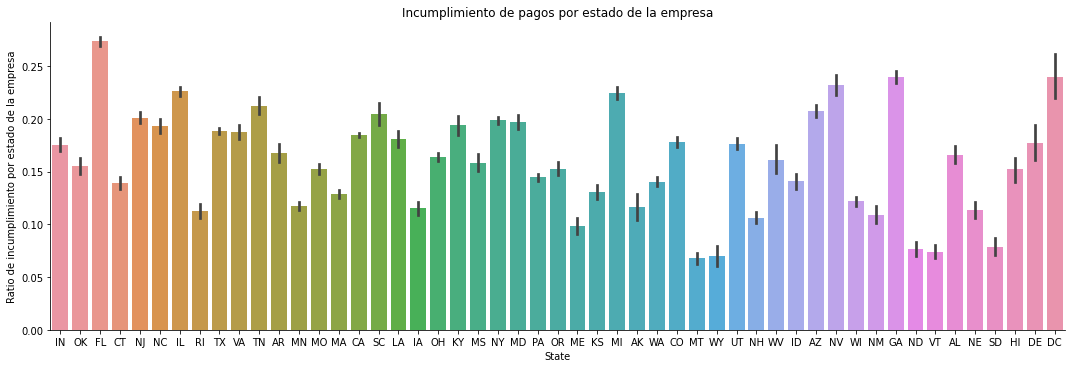

In [ ]:
sns.catplot( data=loan, x="State", y="MIS_Status_numeric", kind="bar", aspect=3); #En el eje y grafica un promedio de MIS_Status_numeric. 
plt.ylabel('Ratio de incumplimiento por estado de la empresa');
plt.title("Incumplimiento de pagos por estado de la empresa");

Vemos que hay estados donde el riesgo de incumplimiento es significativemente mayor que en otros. Esto puede deberse a leyes laborales, la riqueza del estado y factores culturales. 

Analicemos ahora por sectores comerciales.

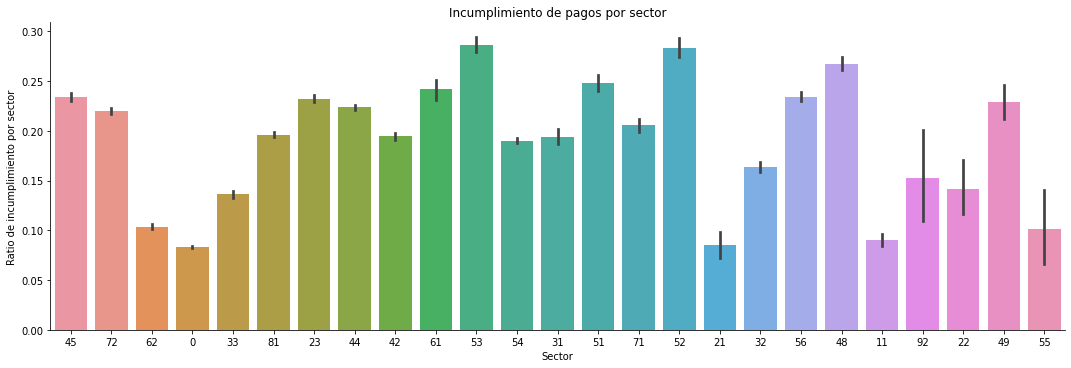

In [ ]:
sns.catplot( data=loan, x="Sector", y="MIS_Status_numeric", kind="bar", aspect=3); #En el eje y grafica un promedio de MIS_Status_numeric. 
plt.ylabel('Ratio de incumplimiento por sector');
plt.title("Incumplimiento de pagos por sector");


(Las líneas sobre las barras indican un intervalo de confianza de la media del 95% suponiendo que el sampleo es aleatorio).

Para entender esto mejor, recordemos la tabla con los códigos de sectores.

|Sector |	Description|
|-------|----------------|
11 | Agriculture, forestry, fishing and hunting
21 |	Mining, quarrying, and oil and gas extraction
22 |	Utilities
23 |	Construction
31–33 |	Manufacturing
42 |	Wholesale trade
44–45 |	Retail trade
48–49 |	Transportation and warehousing
51 |	Information
52 |	Finance and insurance
53 |	Real estate and rental and leasing
54 |	Professional, scientific, and technical services
55 |	Management of companies and enterprises
56 |	Administrative and support and waste management and remediation services
61 |	Educational services
62 |	Health care and social assistance
71 |	Arts, entertainment, and recreation
72 |	Accommodation and food services
81 |	Other services (except public administration)
92 |  Public administration

Vemos que hay sectores como el 52 y 53 ("Finance and insurance"
y	"Real estate and rental and leasing", respectivamente) donde el porcentaje de incumplimiento  es cercano al 30%, mientras que otros sectores como el 11 y el 21 ("Agriculture, forestry, fishing and hunting" y "Mining, quarrying, and oil and gas extraction", respectivamente) donde el porcentaje es menor al 10%. 

Veamos ahora que sucede con relación al número de empleados. 

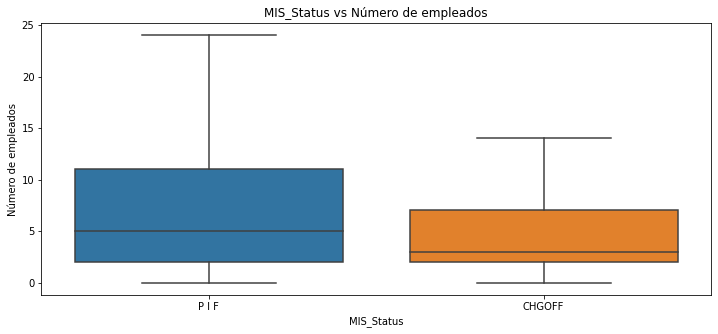

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.boxplot(x='MIS_Status', y = 'NoEmp', data = loan,  showfliers = False)  
plt.title("MIS_Status vs Número de empleados");
ax.set(xlabel='MIS_Status', ylabel='Número de empleados');

Recordemos que los que tuvieron problemas son los catalogados como 'CHGOFF', y los que no tuvieron problemas son los catalogados como 'P I F' (paid in full).<br>

Vemos que, sacando outliers, las empresas que no presentaron problemas al pagar tienen más empleados. Esto nos dice que cuanto mayor es el número de empleados, más probable es el pago sin problema. 

Estimamos, en principio, que esto es porque las empresas con mayor número de empleados están mejor establecidas. Lo que nos lleva a preguntarnos que relación hay entre incumplir y que la empresa sea nueva. El campo NewExist vale 1 si la empresa existía antes del préstamo y 2 si es nueva.
 

Analicemos los porcentajes de los valores de MIS_Status según si es nueva o no.

In [ ]:
loan[loan['NewExist']==2]['MIS_Status'].value_counts(normalize=True)

P I F     0.812452
CHGOFF    0.187548
Name: MIS_Status, dtype: float64

In [ ]:
loan[loan['NewExist']==1]['MIS_Status'].value_counts(normalize=True)

P I F     0.828871
CHGOFF    0.171129
Name: MIS_Status, dtype: float64

Gráficamente:

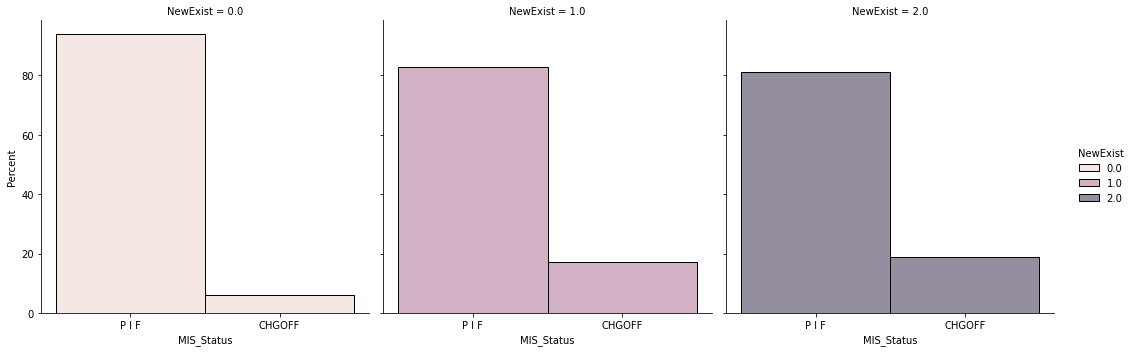

In [ ]:
sns.displot(data=loan, x="MIS_Status", col="NewExist", hue="NewExist", stat='percent', common_norm=False);


Vemos que hay muy poca diferencia en los porcentajes de incumplimiento entre las empresas nuevas y las ya existentes. Lo que descarta la conjetura anterior. <br> 

Por otro lado, vemos que también el parámetro NewExist tiene valores 0, lo que asociamos a que dicho parámetro está no completado. ¿Cuántos valores 0 hay en dicha columna?

In [ ]:
loan[loan['NewExist']==0].shape[0] #shape[0] devuelve el número de filas, es decir, la cantidad de registros donde NewExist es igual a 0.

1034

Este es un número pequeño con respecto al total. <br>
Vemos llamativo que sí haya diferencia entre estas empresas que están descatalogadas y las que se catalogan como nuevas y como ya existentes. No tenemos explicación de esto por el momento.

Con respecto a ser empresa urbana o rural,

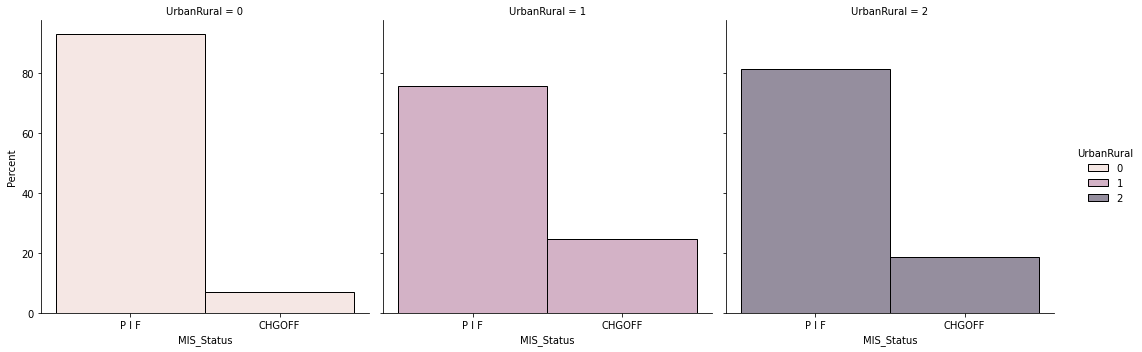

In [ ]:
sns.displot(data=loan, x="MIS_Status", col="UrbanRural", hue="UrbanRural", stat='percent', common_norm=False);

No vemos una diferencia significativa en que sea urbana o no.

### Variables relacionadas al banco o a la línea de crédito###

Analicemos la relación con el estado del banco.

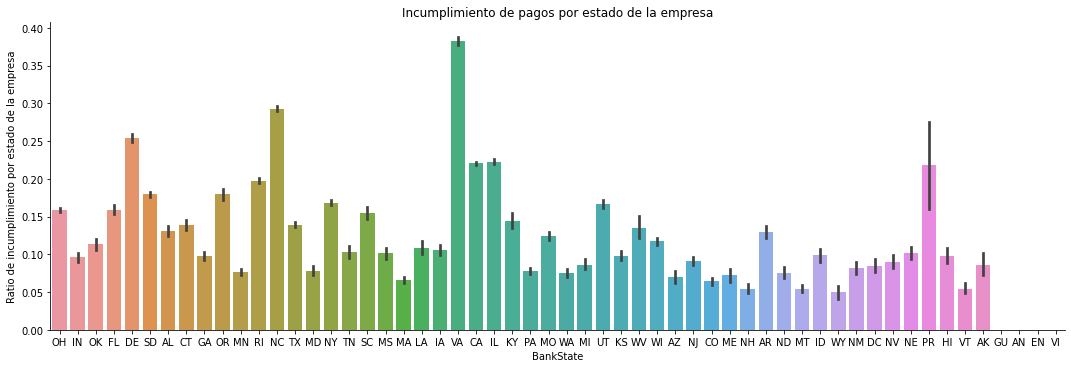

In [ ]:
sns.catplot( data=loan, x="BankState", y="MIS_Status_numeric", kind="bar", aspect=3); #En el eje y grafica un promedio de MIS_Status_numeric. 
#Al ser booleano, transforma True en 1 y el promedio corresponde al porcentaje de incumplimiento en cada sector.
plt.ylabel('Ratio de incumplimiento por estado de la empresa');
plt.title("Incumplimiento de pagos por estado de la empresa");

Es interesante ver que hay diferencias con respecto al estado de la empresa. Por ejemplo, si el banco es de VA (Virginia) los inconvenientes están cerca del 40%. Un valor realmente alto, que no ocurría en el caso del estado de la empresa.

Con respecto a si la línea de crédito es renovable o no:

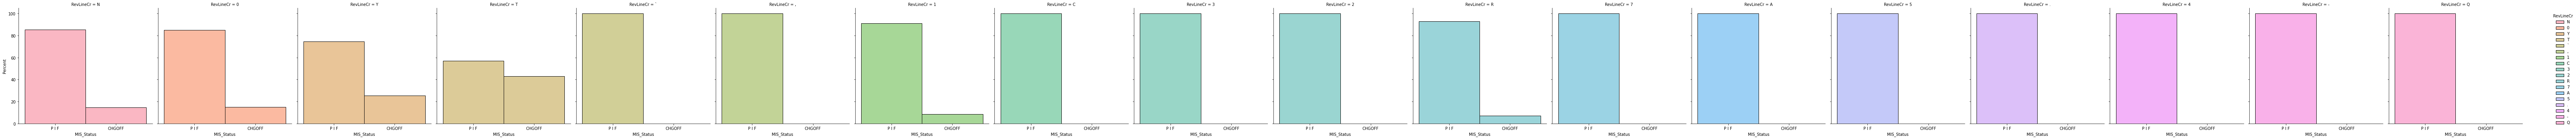

In [ ]:
sns.displot(data=loan, x="MIS_Status", col="RevLineCr", hue="RevLineCr", stat='percent', common_norm=False);

Hay una pequeña diferencia entre 'Y' y 'N', que son los valores que entendemos. Pero habiendo tantos valores que no identificamos, esta columna probablemente sea inusable.

Veamos si las distribuciones de las variables 'DisbursementGross', 'GrAppv' y 'SBA_Appv' son distintas para los préstamos que tuvieron inconvenientes con respecto a los que no.

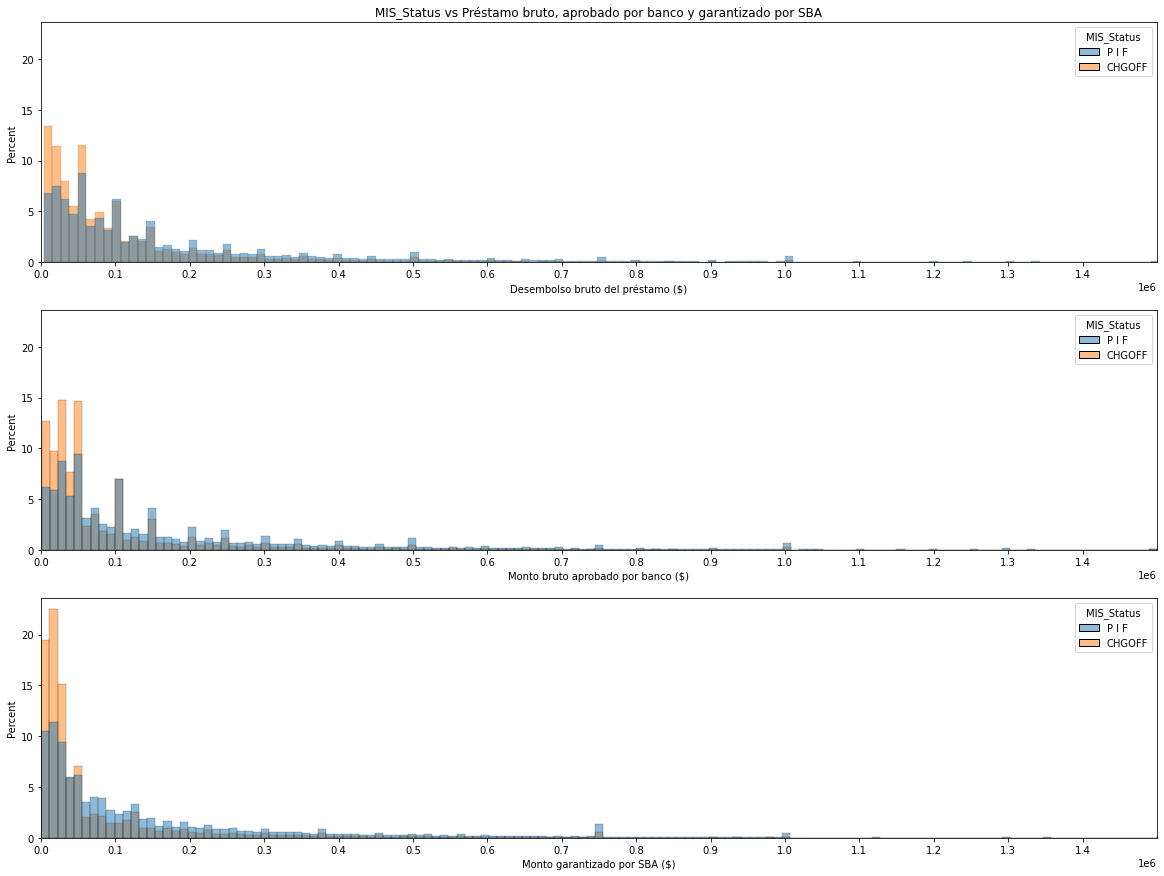

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(20, 15), sharex=False, sharey=True)
sns.histplot(x= 'DisbursementGross', hue = 'MIS_Status',  data = loan, ax=ax[0],bins=1000,stat='percent', common_norm=False) #Common_norm = False es para que haga los porcentajes por separado.             ) 
ax[0].set(xlabel='Desembolso bruto del préstamo ($)', ylabel='Percent')
ax[0].set_title("MIS_Status vs Préstamo bruto, aprobado por banco y garantizado por SBA")
ax[0].set_xlim(0, 1.5e6) #Debido a la existencia de datos extremos, el gráfico se ve chico. Cambiamos el rango así lo vemos más en detalle.
ax[0].set(xticks=np.arange(0, 1.5e6, 1e5));

sns.histplot(x= 'GrAppv', hue = 'MIS_Status',  data = loan, ax=ax[1],bins=500,stat='percent', common_norm=False) #Common_norm = False es para que haga los porcentajes por separado.             ) 
ax[1].set(xlabel='Monto bruto aprobado por banco ($)', ylabel='Percent')
ax[1].set_xlim(0, 1.5e6) #Debido a la existencia de datos extremos, el gráfico se ve chico. Cambiamos el rango así lo vemos más en detalle.
ax[1].set(xticks=np.arange(0, 1.5e6, 1e5));

sns.histplot(x= 'SBA_Appv', hue = 'MIS_Status',  data = loan, ax=ax[2],bins=500,stat='percent', common_norm=False) #Common_norm = False es para que haga los porcentajes por separado.             ) 
ax[2].set(xlabel='Monto garantizado por SBA ($)', ylabel='Percent')
ax[2].set_xlim(0, 1.5e6) #Debido a la existencia de datos extremos, el gráfico se ve chico. Cambiamos el rango así lo vemos más en detalle.
ax[2].set(xticks=np.arange(0, 1.5e6, 1e5));


El porcentaje se refiere con respecto a cada total. Por ejemplo, en el primer rango (primera barra) del primero gráfico, se produjo el 25 % de todos los incumplimientos y un poco menos del 15% de todos los pagados en término.<br>
Los gráficos nos muestran que la mayoría de los préstamos con inconvenientes se encuentran en el rango de entre 0 y 100000 USD, sea sobre el monto total o sobre los montos aprobados.

Para estudiar un poco estas relaciones, miremos los boxplots de los desembolsos brutos con respecto a los préstamos pagados en término y los que tuvieron problemas.

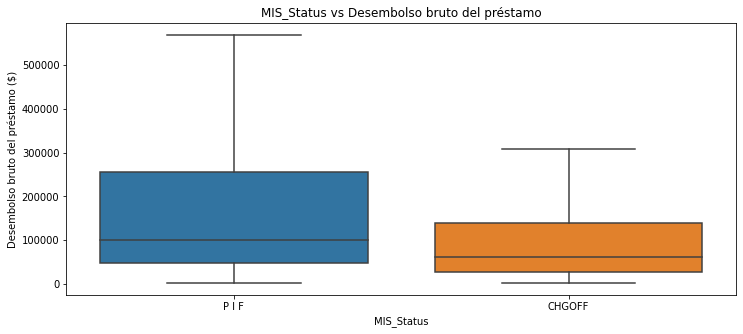

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.boxplot(x='MIS_Status', y = 'DisbursementGross', data = loan, showfliers = False)  ## La existencia de outliers hace que no se vea muy bien el gráfico. Por eso los eliminamos, con showfliers = False
plt.title("MIS_Status vs Desembolso bruto del préstamo");
ax.set(xlabel='MIS_Status', ylabel='Desembolso bruto del préstamo ($)');

Este gráfico nos muestra más claramente que los préstamos que no tuvieron problemas tendieron a ser más grandes. Una hipótesis que podría explicar esto es que los mayores préstamos están asociados a compañías establecidas y en expansión, en una compañía así un préstamo es más probable de ser pagado sin problemas.

Combinemos el monto bruto desembolsado con el número de empleados para estudiar los problemas al pagar el préstamo. Ya habíamos visto que el número de empleados es un factor que tiene relación con el pago a término del préstamo.
Vamos a hacer el gŕafico con un máximo 30 empleados para que sea entendible.

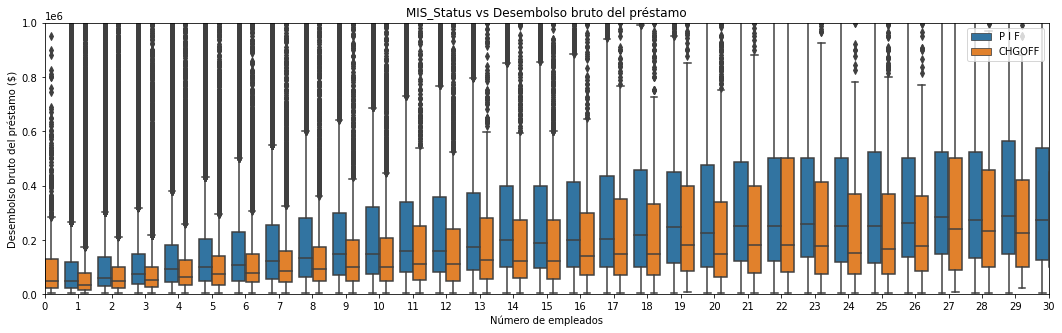

In [ ]:
fig, ax = plt.subplots(figsize=(18, 5))
sns.boxplot(x='NoEmp', hue='MIS_Status', y = 'DisbursementGross', data = loan)  ## BalanceGross=monto desembolsado----- DisbursementGross
plt.title("MIS_Status vs Desembolso bruto del préstamo");
ax.set(xlabel='Número de empleados', ylabel='Desembolso bruto del préstamo ($)')
ax.set_xlim(0,30)
ax.set_ylim(0,1e6)
ax.legend(loc='upper right', bbox_to_anchor=(1, 1.0))

Vemos que a número de empleados fijo (al menos si son máximo 30), los préstamos más grandes tienden a tener menos inconvenientes. Concluimos entonces que la razón de que los préstamos más grandes tienen menos probabilidad de incumplimiento no es explicada (únicamente) por el número de empleados, es otro factor independiente. 

###Variables relacionadas con plazo y años

Analicemos el tiempo de la devolución del préstamo.

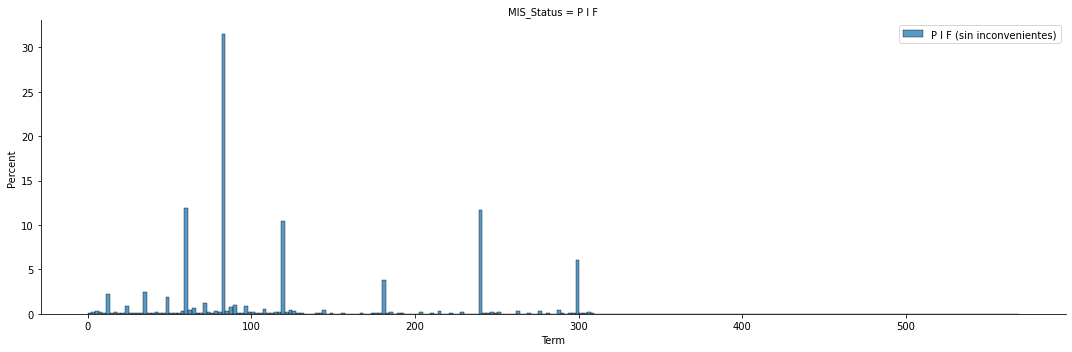

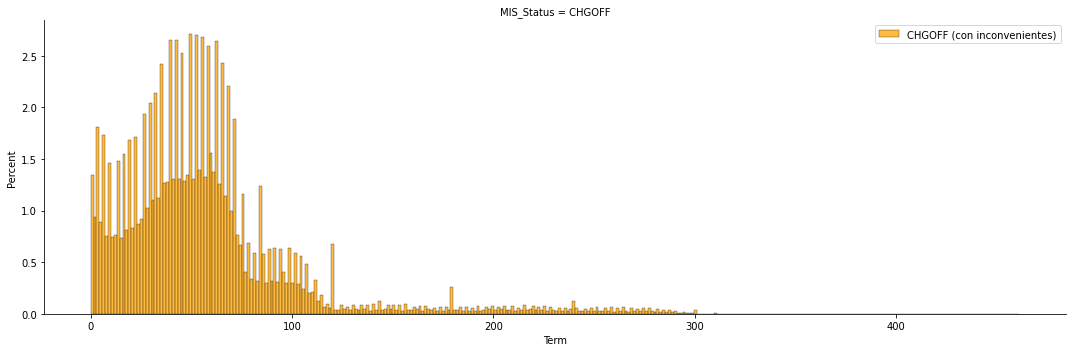

In [ ]:
sns.displot(data=loan[loan['MIS_Status']=='P I F'], x="Term", col = 'MIS_Status' ,stat='percent', aspect= 3);
plt.legend(labels=['P I F (sin inconvenientes)']);
sns.displot(data=loan[loan['MIS_Status']=='CHGOFF'], x="Term", col = 'MIS_Status', color='orange' ,stat='percent', aspect= 3)
plt.legend(labels=['CHGOFF (con inconvenientes)']);

Vemos que la distribuciones tiene distintas características. Los préstamos sin inconvenientes suelen tener duraciones más precisas y focalizadas, mientras que en los que tuvieron inconvenientes la distribución es más dispersa. Esto nos sugiere que los préstamos que tuvieron problemas de pago, los tuvieron desde el principio.

Con respecto a los años, en esta entrega, por cuestiones de tiempo, no vamos a mirar todas las variables con respecto a MIS_Status. 

Miremos las fechas declaradas de incoveniente con los pagos. 

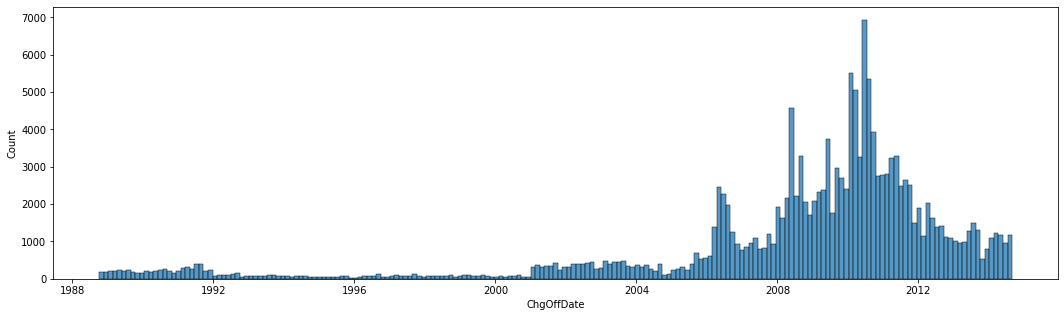

In [ ]:
fig, ax = plt.subplots(figsize=(18, 5));
sns.histplot(data=loan, x='ChgOffDate', ax=ax);

Esto muestra que en el rango 2008-2012 hubo más inconvenientes que en cualquier otro rango de años. Recordemos que la crisis de hipótecas se produjo dentro de ese rango. <br>
De todas formas, este dato no es completo porque no lo estamos viendo porcentual con respecto a un total.

Para graficar el resto de variables debemos hacer algunas transformaciones.

In [ ]:
DisbursementYear=loan['DisbursementDate'].dt.year
DisbursementYear = DisbursementYear.astype('Int64') #Transformo a Int64, porque no dejar transformar a int cuando hay nulos.

ApprovalYear=loan['ApprovalDate'].dt.year
ApprovalYear= ApprovalYear.astype('Int64') #Transformo a Int64, porque no dejar transformar a int cuando hay nulos.

Veamos la relación entre DisbursementYear, ApprovalYear y ApprovalFY.

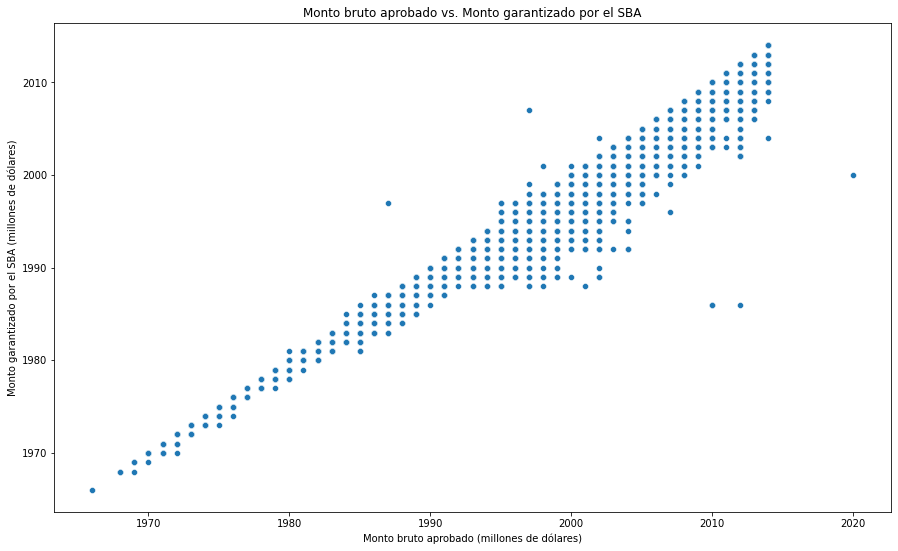

In [ ]:
fig, ax = plt.subplots(figsize=(15, 9))
ax=sns.scatterplot(x=DisbursementYear, y=ApprovalYear);
ax.set(xlabel='Monto bruto aprobado (millones de dólares)', ylabel='Monto garantizado por el SBA (millones de dólares)',title = 'Monto bruto aprobado vs. Monto garantizado por el SBA') ;

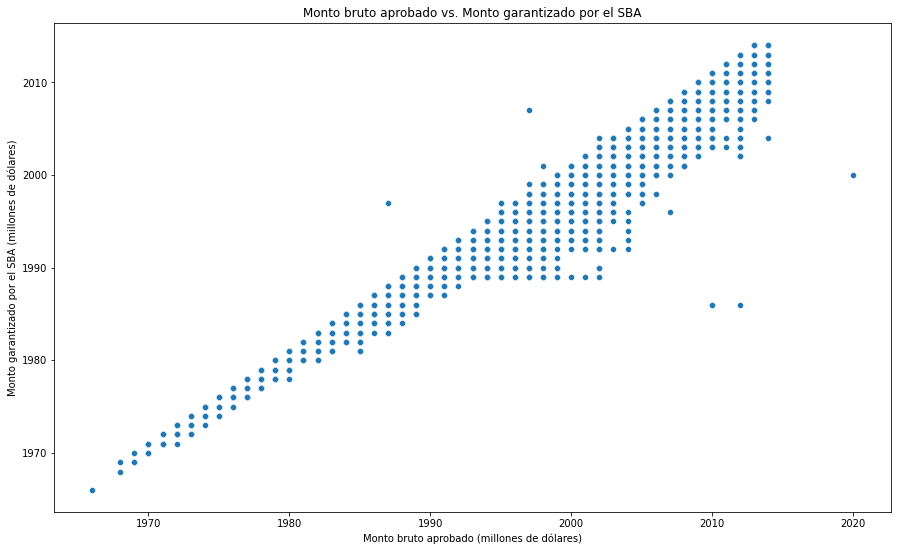

In [ ]:
fig, ax = plt.subplots(figsize=(15, 9))
ax=sns.scatterplot(x=DisbursementYear, y=loan['ApprovalFY']);
ax.set(xlabel='Monto bruto aprobado (millones de dólares)', ylabel='Monto garantizado por el SBA (millones de dólares)',title = 'Monto bruto aprobado vs. Monto garantizado por el SBA') ;

Vemos que, como esperabamos, son datos muy parecidos. Hay corrimientos que dependeran del mes del año y de alguna condición particular, pero no creemos que aporten alguna información útil. Así que vamos a elegir uno solo de estos tres, el año de entrega del préstamo (DisbursementYear), por ser el plazo más tardío de los tres y por lo tanto más cercano al momento en que pudieron surgir inconvenientes de pago.

Miremos la cantidad de préstamos con y sin inconvenientes, por año de entrega.

In [ ]:
DisbYear_vs_MIS =pd.DataFrame(data=DisbursementYear)
DisbYear_vs_MIS.rename(columns={"DisbursementDate": "DisbursementYear"}, inplace = True)
DisbYear_vs_MIS['MIS_Status_numeric']= loan['MIS_Status_numeric']

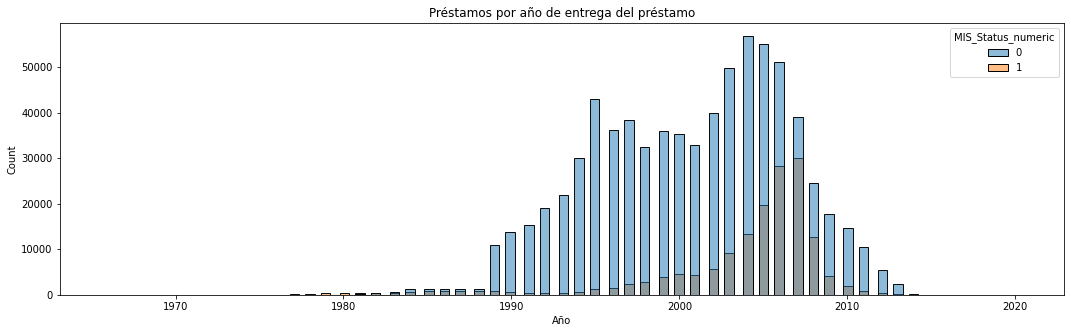

In [ ]:
fig, ax = plt.subplots(figsize=(18, 5), sharex=True, sharey=True);
sns.histplot(data=DisbYear_vs_MIS, x='DisbursementYear', hue= 'MIS_Status_numeric', ax=ax , shrink=3, legend=True);
ax.set(title='Préstamos por año de entrega del préstamo');
ax.set_xlabel('Año');

Vemos dos cosas que nos parecen relevantes: 1) La proporción de préstamos con inconvenientes es muy alta alrededor de 2007. 2)La cantidad de préstamos con fecha menor a 1989 es mucho menor.

Veamos un gráfico de la proporción de 1).

In [ ]:
DisbYear_vs_MIS_Proporcion = DisbYear_vs_MIS.groupby(['DisbursementYear']).mean()
DisbYear_vs_MIS_Proporcion.rename(columns={"MIS_Status_numeric": "CHGOFF_Proportion"}, inplace = True)
DisbYear_vs_MIS_Proporcion.sample(5)

,CHGOFF_Proportion
DisbursementYear,
1970,0.928571
2000,0.112207
2002,0.122015
1985,0.385344
2003,0.155407


Para ser claros, la proporción a la que nos referimos para un cierto año $x$ es <br>

$$\frac{\text{Cantidad de préstamos con inconvenientes de los entregados en el año }x}{\text{Cantidad de préstamos entregados en el año }x}.$$

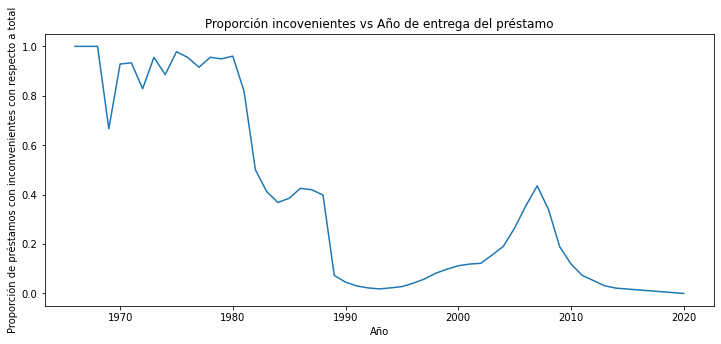

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 5), sharex=True, sharey=True)  
ax.plot(DisbYear_vs_MIS_Proporcion.index, DisbYear_vs_MIS_Proporcion['CHGOFF_Proportion']);
ax.set_title('Proporción incovenientes vs Año de entrega del préstamo') 
ax.set_xlabel('Año')  
ax.set_ylabel('Proporción de préstamos con inconvenientes con respecto a total');


Confirmamos que alrededor de la crisis inmobiliaria de 2007-2008 tenemos un pico de inconvenientes. Así que el contexto económico es un factor relevante. Por otro lado, antes de 1990 vemos que la proporción es muy alta, llegando a 1 en años cercanos a 1970. Conjeturamos que esto puede deberse a una recolección de datos menor y selectiva. Estudiemos mejor eso.


In [ ]:
DisbYear_vs_MIS.groupby(['DisbursementYear']).count()

,MIS_Status_numeric
DisbursementYear,
1966,1
1968,2
1969,3
1970,14
1971,15
1972,35
1973,45
1974,35
1975,46


Encontramos que antes de 1989 la cantidad de préstamos por año no era mucho más que 2000, y en años anteriores a 1970 solo hubo 6 préstamos, por lo que entendemos que muy pocos se registraban. Probablemente, con mucho mayor énfasis en los que tenían problemas. En otras palabras, son una selección sesgada.